In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from io import StringIO

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
# reformat the CSV to use | instead of , to separate rows, then import [a selection] of the data as a dataframe
for_pd = StringIO()
with open('../data/accre-jobs-2020.csv') as accre:
    for line in accre:
        new_line = re.sub(r',', '|', line.rstrip(), count=12)
        print (new_line, file=for_pd)
for_pd.seek(0)
accre_df = pd.read_csv(for_pd, sep='|')#[1000000:1005000] # add this to subset

In [4]:
accre_df.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440


In [5]:
accre_df.tail()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST
3816285,24173815_8,portabella,vennie,32768Mn,30042.68M,1-00:00:00,00:02:27,1,2,production,0:0,COMPLETED,cn312
3816286,24173815_9,portabella,vennie,32768Mn,31067.75M,1-00:00:00,00:02:27,1,2,production,0:0,COMPLETED,cn312
3816287,24173815_10,portabella,vennie,32768Mn,21207.96M,1-00:00:00,00:01:40,1,2,production,0:0,COMPLETED,cn368
3816288,24173817,boysenberries,hortensia,100000Mn,0,1-00:00:00,00:03:05,1,8,production,0:0,RUNNING,cn1509
3816289,24173866,horseradish,ariane,20480Mn,0,05:00:00,00:02:05,1,1,production,0:0,RUNNING,cn1131


In [6]:
accre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3816290 entries, 0 to 3816289
Data columns (total 13 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   JOBID      object
 1   ACCOUNT    object
 2   USER       object
 3   REQMEM     object
 4   USEDMEM    object
 5   REQTIME    object
 6   USEDTIME   object
 7   NODES      int64 
 8   CPUS       int64 
 9   PARTITION  object
 10  EXITCODE   object
 11  STATE      object
 12  NODELIST   object
dtypes: int64(2), object(11)
memory usage: 378.5+ MB


#### Need to change NODES and CPU to integers

In [7]:
accre_df['NODES'] = accre_df['NODES'].astype(int)
accre_df['CPUS'] = accre_df['CPUS'].astype(int)

In [8]:
accre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3816290 entries, 0 to 3816289
Data columns (total 13 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   JOBID      object
 1   ACCOUNT    object
 2   USER       object
 3   REQMEM     object
 4   USEDMEM    object
 5   REQTIME    object
 6   USEDTIME   object
 7   NODES      int64 
 8   CPUS       int64 
 9   PARTITION  object
 10  EXITCODE   object
 11  STATE      object
 12  NODELIST   object
dtypes: int64(2), object(11)
memory usage: 378.5+ MB


#### We also need to convert the times to total seconds 

In [9]:
## This splits the hour, minutes, seconds from the __TIME columns
accre_df['hours_min_sec_req'] = accre_df['REQTIME'].str[-8:]
accre_df['hours_min_sec_used'] = accre_df['USEDTIME'].str[-8:]

## This splits the day from the ___TIME columns
accre_df['day_req'] = accre_df['REQTIME'].str.extract('(.*?)-')
accre_df['day_used'] = accre_df['USEDTIME'].str.extract('(.*?)-')

## Adds zeros to the day column where null
accre_df['day_req'] = accre_df['day_req'].fillna(0)
accre_df['day_used'] = accre_df['day_used'].fillna(0)

In [10]:
# Converting days to integers to use in converting to seconds
accre_df['day_req'] = accre_df['day_req'].astype(int)
accre_df['day_used'] = accre_df['day_used'].astype(int)

In [11]:
#converting to timedelta to then use dt.total_seconds()
accre_df['hours_min_sec_req'] =  pd.to_timedelta(accre_df['hours_min_sec_req'], unit='s')
accre_df['hours_min_sec_used'] =  pd.to_timedelta(accre_df['hours_min_sec_used'], unit='s')

accre_df['hours_min_sec_req'] = accre_df['hours_min_sec_req'].dt.total_seconds()
accre_df['hours_min_sec_used'] = accre_df['hours_min_sec_used'].dt.total_seconds()

In [12]:
accre_df.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST,hours_min_sec_req,hours_min_sec_used,day_req,day_used
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531,64800.0,64828.0,13,13
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441,64800.0,53456.0,13,12
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464,64800.0,64820.0,13,13
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473,64800.0,13832.0,13,12
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440,64800.0,64803.0,13,13


In [13]:
#makes total seconds columns 
accre_df['total_sec_req'] = (accre_df['day_req'] * 86400) + accre_df['hours_min_sec_req']
accre_df['total_sec_used'] = (accre_df['day_used'] * 86400) + accre_df['hours_min_sec_used']

In [14]:
accre_df.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST,hours_min_sec_req,hours_min_sec_used,day_req,day_used,total_sec_req,total_sec_used
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531,64800.0,64828.0,13,13,1188000.0,1188028.0
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441,64800.0,53456.0,13,12,1188000.0,1090256.0
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464,64800.0,64820.0,13,13,1188000.0,1188020.0
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473,64800.0,13832.0,13,12,1188000.0,1050632.0
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440,64800.0,64803.0,13,13,1188000.0,1188003.0


In [15]:
accre_df['ACCOUNT'].value_counts()

cms              807408
cep              609282
summer           380840
galia            198180
carrot           192551
orange           158400
cms_lowprio      135682
casaba           117722
portabella       110139
bunch            105877
cmsadmin         102589
bulk              78743
boysenberries     57622
sharlin           57479
horseradish       53708
grisette          42447
sweet             40241
mixed             39316
retailer          39091
key               37711
round             36830
wood              32609
savoy             30508
sprite            25892
atemoyas          25020
winged            24782
garlic            20350
wax               19623
celery            17399
alkmene           15606
sunburst          14249
fresh             11981
chickpeas         10919
regal             10497
large             10411
turban            10061
texas              9769
basil              9768
belle              8729
clara              8400
endive             8339
bertanne        

In [16]:
accre_df['STATE'].value_counts()

COMPLETED              3804644
CANCELLED                 6107
RUNNING                   3108
FAILED                    1406
CANCELLED by 686562        681
OUT_OF_MEMORY               94
TIMEOUT                     80
CANCELLED by 505355         63
CANCELLED by 855431         17
CANCELLED by 782611         13
CANCELLED by 9206            9
CANCELLED by 397600          7
CANCELLED by 200557          6
CANCELLED by 0               5
CANCELLED by 454080          4
CANCELLED by 486541          4
CANCELLED by 199766          4
CANCELLED by 649319          3
CANCELLED by 9201            3
CANCELLED by 483348          3
CANCELLED by 9202            3
CANCELLED by 546080          2
CANCELLED by 791651          2
CANCELLED by 90423           2
CANCELLED by 515423          2
CANCELLED by 666860          2
CANCELLED by 895426          2
CANCELLED by 693461          2
CANCELLED by 199066          2
CANCELLED by 124006          2
CANCELLED by 785271          1
CANCELLED by 782535          1
CANCELLE

In [17]:
accre_df['PARTITION'].value_counts()

production              3311788
nogpfs                   327652
sam                       79151
pascal                    48004
turing                    39406
debug                      6738
maxwell                    3348
cgw-capra1                   83
cgw-dougherty1               72
cgw-cqs1                     34
cgw-cqs3                      4
cgw-vm-qa-flatearth1          4
cgw-rocksteady                2
devel                         2
cgw-tbi01                     2
Name: PARTITION, dtype: int64

#### Do any of the production partition nodes show an unusual number of failed jobs relative to the others? (Ignore Debug Partition)

Let's check to see failure by nodes in the production partition

In [18]:
accre_df_failures = accre_df[
    (accre_df['STATE'] == 'FAILED') &
    (accre_df['PARTITION'] == 'production')
]

accre_df_failures = accre_df_failures.reset_index()

accre_df_failures.head(10)

,index,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST,hours_min_sec_req,hours_min_sec_used,day_req,day_used,total_sec_req,total_sec_used
0,104031,17234446,crowns,tena,5120Mc,8737.88M,1-12:00:00,1-12:00:12,51,1,production,1:0,FAILED,"cn[336-338,340,347-348,374-380,386-396,401,403...",43200.0,43212.0,1,1,129600.0,129612.0
1,124397,17261993,burro,golda,1024Mc,0,00:30:00,00:00:01,1,1,production,13:0,FAILED,cn394,1800.0,1.0,0,0,1800.0,1.0
2,167790,17329248,pearl,auther,1024Mc,0,00:30:00,00:00:00,2,8,production,2:0,FAILED,"cn[326,499]",1800.0,0.0,0,0,1800.0,0.0
3,199503,17354412,crowns,tena,5120Mc,4277.54M,1-06:00:00,01:49:02,75,1,production,1:0,FAILED,"cn[331-338,340,347-349,361-367,386-393,395-396...",21600.0,6542.0,1,0,108000.0,6542.0
4,226420,17390284,bulk,lela,20480Mn,4028.41M,20:00:00,00:01:01,10,1,production,1:0,FAILED,"cn[1263,1275,1303,1309,1335-1336,1351,1372,137...",72000.0,61.0,0,0,72000.0,61.0
5,226427,17390291,bulk,lela,20480Mn,3509.69M,20:00:00,00:00:37,10,1,production,1:0,FAILED,"cn[1263,1275,1287,1303,1309,1335-1336,1351,137...",72000.0,37.0,0,0,72000.0,37.0
6,226428,17390294,bulk,lela,20480Mn,0,20:00:00,00:00:06,10,1,production,1:0,FAILED,"cn[1263,1275,1287,1303,1309,1335-1336,1351,137...",72000.0,6.0,0,0,72000.0,6.0
7,226451,17390325,bulk,lela,20480Mn,0,20:00:00,00:00:11,10,1,production,1:0,FAILED,"cn[1263,1275,1287,1303,1309,1335-1336,1348,137...",72000.0,11.0,0,0,72000.0,11.0
8,233647,17408015,crowns,tena,5120Mc,17546.22M,1-06:00:00,1-06:00:15,41,1,production,1:0,FAILED,"cn[1274-1277,1303-1321,1345-1354,1420-1427]",21600.0,21615.0,1,1,108000.0,108015.0
9,317523,17535554,tips,ole,81920Mn,19.63M,03:40:00,00:00:35,2,12,production,1:0,FAILED,"cn[1442,1444]",13200.0,35.0,0,0,13200.0,35.0


In [19]:
accre_df_failures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               500 non-null    int64  
 1   JOBID               500 non-null    object 
 2   ACCOUNT             500 non-null    object 
 3   USER                500 non-null    object 
 4   REQMEM              500 non-null    object 
 5   USEDMEM             500 non-null    object 
 6   REQTIME             500 non-null    object 
 7   USEDTIME            500 non-null    object 
 8   NODES               500 non-null    int64  
 9   CPUS                500 non-null    int64  
 10  PARTITION           500 non-null    object 
 11  EXITCODE            500 non-null    object 
 12  STATE               500 non-null    object 
 13  NODELIST            500 non-null    object 
 14  hours_min_sec_req   500 non-null    float64
 15  hours_min_sec_used  500 non-null    float64
 16  day_req 

We started with 3,816,290 in our dataset and are now down to 395 failures after whittling it down to failures in the production partition. We're looking at a failure rate of .01%

In [20]:
accre_df_failures['NODELIST'].value_counts().head(20)

cn1273           9
cn1364           6
cn304            6
cn1458           6
cn1479           5
cn1450           5
cn1270           5
cn[1530-1531]    5
cn1449           4
cn[1468-1469]    4
cn1278           4
cn1436           4
cn1267           4
cn1448           4
cn1275           4
cn[1284-1286]    4
cn382            3
cn[1530-1533]    3
cn1430           3
cn416            3
Name: NODELIST, dtype: int64

In [21]:
# create DF from value_counts by renaming the axis and reseting the index
failures_by_nodelist = accre_df_failures['NODELIST'].value_counts().rename_axis('NODELIST').reset_index(name='COUNTS')
failures_by_nodelist.head()

,NODELIST,COUNTS
0,cn1273,9
1,cn1364,6
2,cn304,6
3,cn1458,6
4,cn1479,5


In [22]:
failures_by_nodelist['COUNTS'].mean()

1.4749262536873156

The average number of failures by node in this list 1.47

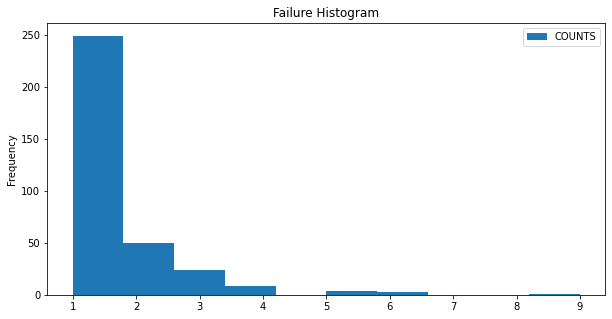

In [23]:
failures_by_nodelist.plot(kind = 'hist', title = 'Failure Histogram', figsize = (10, 5));

As you can see from the histogram, we have outliers off to the right with some others that are failing more regularly

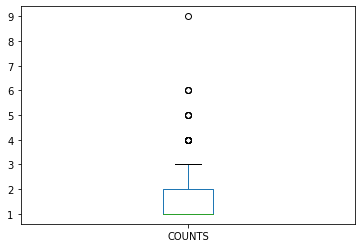

In [24]:
failures_by_nodelist.plot(kind='box');

Nodes that fail more than 3 times are considered outliers!

In [25]:
failures_by_nodelist[failures_by_nodelist['COUNTS'] > 3]

,NODELIST,COUNTS
0,cn1273,9
1,cn1364,6
2,cn304,6
3,cn1458,6
4,cn1479,5
5,cn1450,5
6,cn1270,5
7,cn[1530-1531],5
8,cn1449,4
9,cn[1468-1469],4


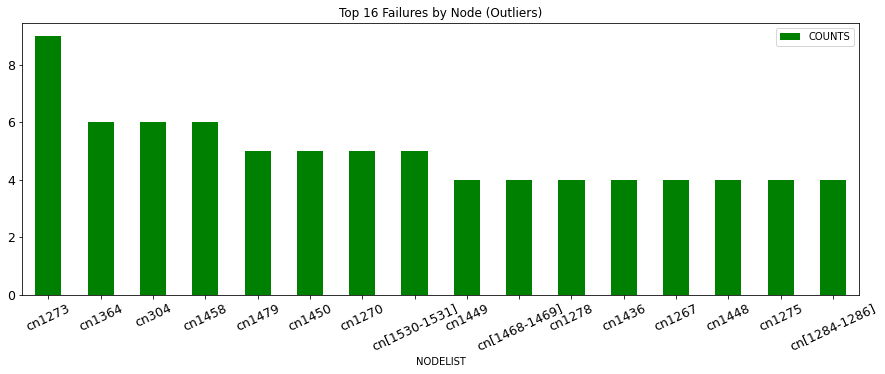

In [26]:
failures_by_nodelist.head(16).plot(
    kind = 'bar', 
    x = 'NODELIST',
    y = 'COUNTS',
    title = 'Top 16 Failures by Node (Outliers)',
    color = 'green', 
    figsize = (15,5),
    rot = 25, 
    fontsize = 12.5
);

Let's look at cn1273 specifically

In [27]:
cn1273_df = accre_df_failures[accre_df_failures['NODELIST'] == 'cn1273']
cn1273_df

,index,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST,hours_min_sec_req,hours_min_sec_used,day_req,day_used,total_sec_req,total_sec_used
17,425718,17658358,sunburst,rufus,10240Mc,2098.61M,05:00:00,00:27:42,1,1,production,127:0,FAILED,cn1273,18000.0,1662.0,0,0,18000.0,1662.0
303,1962081,20477753_1,carrot,bryon,16384Mc,3.37M,00:30:00,00:00:09,1,2,production,1:0,FAILED,cn1273,1800.0,9.0,0,0,1800.0,9.0
353,2462270,21521374,retailer,justine,1024Mc,1.87M,00:30:00,00:04:06,1,1,production,127:0,FAILED,cn1273,1800.0,246.0,0,0,1800.0,246.0
478,3656207,23878410,plantain,doctor,10240Mn,0,00:15:00,00:00:00,1,4,production,2:0,FAILED,cn1273,900.0,0.0,0,0,900.0,0.0
479,3656672,23878740,plantain,doctor,10240Mn,0,00:15:00,00:00:00,1,4,production,2:0,FAILED,cn1273,900.0,0.0,0,0,900.0,0.0
480,3656676,23878744,plantain,doctor,10240Mn,0,00:15:00,00:00:01,1,4,production,2:0,FAILED,cn1273,900.0,1.0,0,0,900.0,1.0
481,3656684,23878756,plantain,doctor,10240Mn,0,00:15:00,00:00:00,1,4,production,2:0,FAILED,cn1273,900.0,0.0,0,0,900.0,0.0
482,3656701,23878814,plantain,doctor,10240Mn,0,00:15:00,00:00:17,1,4,production,1:0,FAILED,cn1273,900.0,17.0,0,0,900.0,17.0
483,3656773,23878957,plantain,doctor,10240Mn,558.93M,00:15:00,00:15:07,1,4,production,1:0,FAILED,cn1273,900.0,907.0,0,0,900.0,907.0


According to the Exit Codes, all of the jobs failured due to user error for cn1273! Perhaps we should only look into failures that occured due to the job or node (ex: Exit Code 0:1) 

In [28]:
accre_df_failures[accre_df_failures['EXITCODE'].str.startswith('0:')]

,index,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST,hours_min_sec_req,hours_min_sec_used,day_req,day_used,total_sec_req,total_sec_used


Looks like every failure in the Production partition is due to user error. Let's see what accounts need the most help to avoid future failure

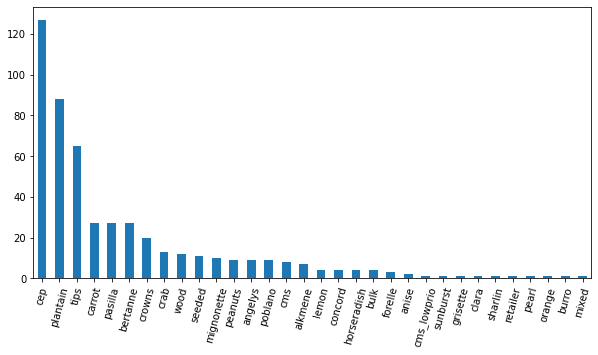

In [29]:
accre_df_failures['ACCOUNT'].value_counts().plot(kind ='bar', figsize=(10,5), rot=75);

In [30]:
accre_df_failures_by_account = accre_df_failures['ACCOUNT'].value_counts()
accre_df_failures_by_account

cep            127
plantain        88
tips            65
carrot          27
pasilla         27
bertanne        27
crowns          20
crab            13
wood            12
seeded          11
mignonette      10
peanuts          9
angelys          9
poblano          9
cms              8
alkmene          7
lemon            4
concord          4
horseradish      4
bulk             4
forelle          3
anise            2
cms_lowprio      1
sunburst         1
grisette         1
clara            1
sharlin          1
retailer         1
pearl            1
orange           1
burro            1
mixed            1
Name: ACCOUNT, dtype: int64

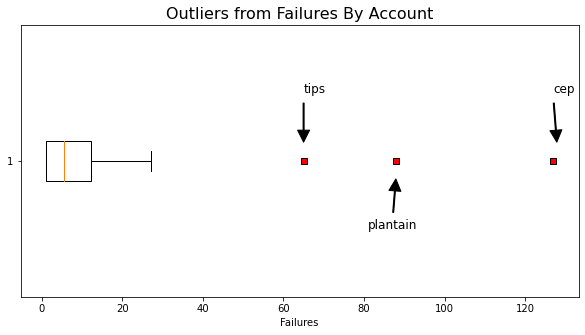

In [31]:
red_square = dict(markerfacecolor='r', marker='s')

plt.figure(figsize = (10,5))
plt.title('Outliers from Failures By Account', fontsize=16)
plt.xlabel('Failures')
plt.annotate(s = 'cep', xy = (128, 1.05), fontsize = 12,
             xytext = (127, 1.25), arrowprops=dict(facecolor='black', shrink=0.1, width=1))
plt.annotate(s = 'plantain', xy = (88, .95), fontsize = 12,
             xytext = (81, .75), arrowprops=dict(facecolor='black', shrink=0.1, width = 1))
plt.annotate(s = 'tips', xy = (65, 1.05), fontsize = 12,
             xytext = (65, 1.25), arrowprops=dict(facecolor='black', shrink=0.1, width = 1))
plt.boxplot(accre_df_failures_by_account,  
            vert = False, 
            flierprops=red_square);